In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
trainpath = '../datasets/GpositivePseAAC/Gram_positivePseAAC519_train_MVMD.mat'
testpath = '../datasets/GpositivePseAAC/Gram_positivePseAAC519_test_MVMD.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], np.array(train_['labels'])

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], np.array(test_['labels'])

a = train_data.max(axis=0)
b = train_data.min(axis=0)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 208/208 [00:00<00:00, 2542.97it/s]

Train data shape:  (311, 1, 300)
Train labels shape:  (311, 4)
Test data shape:  (208, 1, 300)
Test labels shape:  (208, 4)


## DSLL Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (311, 1, 300)
Train Labels shape is  (311, 2)
Classes trained are: 0 to 2


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 4
Class 1, class 1 neurons = 2, class 0 neurons = 2


100%|██████████| 2500/2500 [1:55:59<00:00,  2.78s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.15625    |
| zero_one_loss       | 0.302885   |
| one_error           | 0.00961538 |
| micro av. jaccard   | 0.398148   |
| macro av. jaccard   | 0.212871   |
| micro av. precision | 0.581081   |
| macro av. precision | 0.290541   |
| micro av. recall    | 0.558442   |
| macro av. recall    | 0.307143   |
| micro av. f1        | 0.569536   |
| macro av. f1        | 0.298611   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.15625    |
| zero_one_loss       | 0.302885   |
| one_error           | 0.00961538 |
| micro av. jaccard   | 0.398148   |
| macro av. jaccard   | 0.212871   |
| micro av. precision | 0.581081  

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 3, class 0 neurons = 21
Class 1, class 1 neurons = 2, class 0 neurons = 19
Class 2, class 1 neurons = 3, class 0 neurons = 11


100%|██████████| 2500/2500 [6:13:48<00:00,  8.97s/it]  


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.225962 |
| zero_one_loss       | 0.225962 |
| one_error           | 0.225962 |
| micro av. jaccard   | 0.631373 |
| macro av. jaccard   | 0.619524 |
| micro av. precision | 0.774038 |
| macro av. precision | 0.764844 |
| micro av. recall    | 0.774038 |
| macro av. recall    | 0.761398 |
| micro av. f1        | 0.774038 |
| macro av. f1        | 0.762943 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 3) (208, 3)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.173077   |
| zero_one_loss       | 0.394231   |
| one_error           | 0.00480769 |
| micro av. jaccard   | 0.480769   |
| macro av. jaccard   | 0.32996    |
| micro av. precision | 0.675676   |
| macro av. precision | 0.447549   |
| micro av. re

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 27
Class 1, class 1 neurons = 2, class 0 neurons = 20
Class 2, class 1 neurons = 6, class 0 neurons = 17
Class 3, class 1 neurons = 6, class 0 neurons = 5


100%|██████████| 2500/2500 [3:06:10<00:00,  4.47s/it]  


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.192308 |
| zero_one_loss       | 0.192308 |
| one_error           | 0.192308 |
| micro av. jaccard   | 0.677419 |
| macro av. jaccard   | 0.565179 |
| micro av. precision | 0.807692 |
| macro av. precision | 0.738182 |
| micro av. recall    | 0.807692 |
| macro av. recall    | 0.67655  |
| micro av. f1        | 0.807692 |
| macro av. f1        | 0.696217 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 4) (208, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.169471 |
| zero_one_loss       | 0.442308 |
| one_error           | 0        |
| micro av. jaccard   | 0.481618 |
| macro av. jaccard   | 0.353569 |
| micro av. precision | 0.675258 |
| macro av. precision | 0.498377 |
| micro av. recall    | 0.626794

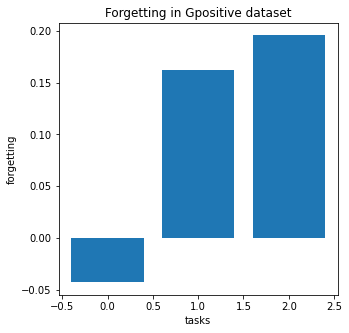

In [3]:
hparams_dict = {
    'inputs': 300,
    'outputs': 4,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Gpositive',
    'tasks': {'samples': None, 'labels': [2, 1, 1]},
    'seed': 2,
    'ckpt_dir': './checkpoints/gpositive',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (311, 1, 300)
Train Labels shape is  (311, 2)
Classes trained are: 0 to 2


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 5
Class 1, class 1 neurons = 2, class 0 neurons = 2


100%|██████████| 2500/2500 [33:42<00:00,  1.24it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.117788   |
| zero_one_loss       | 0.225962   |
| one_error           | 0.00961538 |
| micro av. jaccard   | 0.3        |
| macro av. jaccard   | 0.166667   |
| micro av. precision | 0.6        |
| macro av. precision | 0.3        |
| micro av. recall    | 0.375      |
| macro av. recall    | 0.214286   |
| micro av. f1        | 0.461538   |
| macro av. f1        | 0.25       |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.117788   |
| zero_one_loss       | 0.225962   |
| one_error           | 0.00961538 |
| micro av. jaccard   | 0.3        |
| macro av. jaccard   | 0.166667   |
| micro av. precision | 0.6       

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 13, class 0 neurons = 13
Class 1, class 1 neurons = 2, class 0 neurons = 19
Class 2, class 1 neurons = 2, class 0 neurons = 4


100%|██████████| 2500/2500 [1:15:15<00:00,  1.81s/it]


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.274038 |
| zero_one_loss       | 0.274038 |
| one_error           | 0.274038 |
| micro av. jaccard   | 0.569811 |
| macro av. jaccard   | 0.542273 |
| micro av. precision | 0.725962 |
| macro av. precision | 0.694521 |
| micro av. recall    | 0.725962 |
| macro av. recall    | 0.698447 |
| micro av. f1        | 0.725962 |
| macro av. f1        | 0.696304 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 3) (208, 3)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.166667 |
| zero_one_loss       | 0.394231 |
| one_error           | 0        |
| micro av. jaccard   | 0.384615 |
| macro av. jaccard   | 0.261613 |
| micro av. precision | 0.601852 |
| macro av. precision | 0.405871 |
| micro av. recall    | 0.515873

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 16, class 0 neurons = 16
Class 1, class 1 neurons = 2, class 0 neurons = 21
Class 2, class 1 neurons = 3, class 0 neurons = 21
Class 3, class 1 neurons = 3, class 0 neurons = 11


100%|██████████| 2500/2500 [1:59:14<00:00,  2.86s/it]


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.225962 |
| zero_one_loss       | 0.225962 |
| one_error           | 0.225962 |
| micro av. jaccard   | 0.631373 |
| macro av. jaccard   | 0.619524 |
| micro av. precision | 0.774038 |
| macro av. precision | 0.764844 |
| micro av. recall    | 0.774038 |
| macro av. recall    | 0.761398 |
| micro av. f1        | 0.774038 |
| macro av. f1        | 0.762943 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 4) (208, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.177885 |
| zero_one_loss       | 0.461538 |
| one_error           | 0        |
| micro av. jaccard   | 0.457875 |
| macro av. jaccard   | 0.343624 |
| micro av. precision | 0.661376 |
| macro av. precision | 0.488101 |
| micro av. recall    | 0.598086

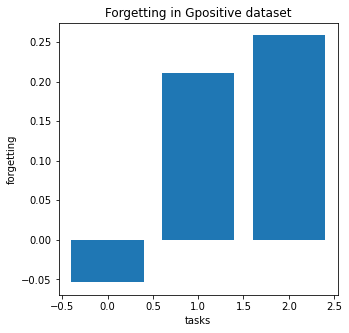

In [4]:
hparams_dict = {
    'inputs': 300,
    'outputs': 4,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Gpositive',
    'tasks': {'samples': None, 'labels': [2, 1, 1]},
    'seed': 3,
    'ckpt_dir': './checkpoints/gpositive',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (311, 1, 300)
Train Labels shape is  (311, 2)
Classes trained are: 0 to 2


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 4
Class 1, class 1 neurons = 2, class 0 neurons = 2


100%|██████████| 2500/2500 [28:58<00:00,  1.44it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.151442   |
| zero_one_loss       | 0.293269   |
| one_error           | 0.00961538 |
| micro av. jaccard   | 0.416667   |
| macro av. jaccard   | 0.222772   |
| micro av. precision | 0.592105   |
| macro av. precision | 0.296053   |
| micro av. recall    | 0.584416   |
| macro av. recall    | 0.321429   |
| micro av. f1        | 0.588235   |
| macro av. f1        | 0.308219   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.151442   |
| zero_one_loss       | 0.293269   |
| one_error           | 0.00961538 |
| micro av. jaccard   | 0.416667   |
| macro av. jaccard   | 0.222772   |
| micro av. precision | 0.592105  

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 3, class 0 neurons = 22
Class 1, class 1 neurons = 2, class 0 neurons = 18
Class 2, class 1 neurons = 6, class 0 neurons = 5


100%|██████████| 2500/2500 [1:18:55<00:00,  1.89s/it]


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.197115 |
| zero_one_loss       | 0.197115 |
| one_error           | 0.197115 |
| micro av. jaccard   | 0.670683 |
| macro av. jaccard   | 0.559729 |
| micro av. precision | 0.802885 |
| macro av. precision | 0.728364 |
| micro av. recall    | 0.802885 |
| macro av. recall    | 0.673405 |
| micro av. f1        | 0.802885 |
| macro av. f1        | 0.69145  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 3) (208, 3)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.160256 |
| zero_one_loss       | 0.389423 |
| one_error           | 0        |
| micro av. jaccard   | 0.39759  |
| macro av. jaccard   | 0.267542 |
| micro av. precision | 0.622642 |
| macro av. precision | 0.414216 |
| micro av. recall    | 0.52381 

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 33
Class 1, class 1 neurons = 2, class 0 neurons = 21
Class 2, class 1 neurons = 13, class 0 neurons = 13
Class 3, class 1 neurons = 3, class 0 neurons = 11


100%|██████████| 2500/2500 [9:25:52<00:00, 13.58s/it]  


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.235577 |
| zero_one_loss       | 0.235577 |
| one_error           | 0.235577 |
| micro av. jaccard   | 0.618677 |
| macro av. jaccard   | 0.609689 |
| micro av. precision | 0.764423 |
| macro av. precision | 0.754575 |
| micro av. recall    | 0.764423 |
| macro av. recall    | 0.757446 |
| micro av. f1        | 0.764423 |
| macro av. f1        | 0.755839 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 4) (208, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.173077 |
| zero_one_loss       | 0.456731 |
| one_error           | 0        |
| micro av. jaccard   | 0.476364 |
| macro av. jaccard   | 0.355523 |
| micro av. precision | 0.664975 |
| macro av. precision | 0.495365 |
| micro av. recall    | 0.626794

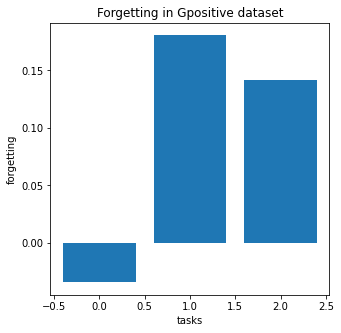

In [5]:
hparams_dict = {
    'inputs': 300,
    'outputs': 4,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Gpositive',
    'tasks': {'samples': None, 'labels': [2, 1, 1]},
    'seed': 4,
    'ckpt_dir': './checkpoints/gpositive',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)